In [ ]:
#code of Interactive Quantum Classifier Inspired by Quantum Open System Theory
#LINK https://ieeexplore.ieee.org/document/9533917

#LINK https://ieeexplore.ieee.org/stamp/stamp.jsp?tp=&arnumber=9533917

#this code was written by Fernando Maciano de Paula Neto (fernando@cin.ufpe.br)

In [ ]:
import numpy as np
from scipy.linalg import expm as expMatrix
# Importing the necessary Python libraries
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score # Getting the Iris dataset from Scikit-Learn
from sklearn import preprocessing
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
from matplotlib.collections import EventCollection

In [ ]:
def create_sigmaE(vectorX, vectorW):
  #x = x1,x2,x2,...,xn
  n = len(vectorX)
  sigmaE = np.zeros((n,n))
  for i in range(n):
    #print("VETOR X", vectorX)
    sigmaE[i,i] = vectorX[i]*vectorW[i]
  
  return sigmaE

In [ ]:
def create_sigmaQ(n):
  sigmaQ = np.zeros((n,n))
  sigmaX = np.array([[0,1], [1,0]])
  sigmaY = np.array([[0,-1j], [1j,0]])
  sigmaZ = np.array([[1,0], [0,-1]])
  sigmaQ = sigmaX + sigmaY + sigmaZ

  return sigmaQ

In [ ]:
def create_Uoperator(sigmaQ, sigmaE):
  return np.matrix(expMatrix(1j*np.kron(sigmaQ, sigmaE)))

In [ ]:
def create_p(psi):
  #psi_cog is a quantum column vector in the form [[alfa],[beta]]
  psi = np.matrix(psi)
  return psi * psi.getH()

In [ ]:
def create_classifier(vectorX, vectorW):
  sigmaQ = create_sigmaQ(2)
  sigmaE = create_sigmaE(vectorX, vectorW)
  U_operator = create_Uoperator(sigmaQ, sigmaE)
  p_cog = create_p([[1/np.sqrt(2)],[1/np.sqrt(2)]]) #|psi> = 1/sqrt(2)|0> + 1/sqrt(2)|1>
  N = len(vectorX)
  p_env = create_p([[1/np.sqrt(N)] for i in range(N)]) #|psi_env> = 1/sqrt(N)|0> + 1/sqrt(N)|1> + ... + 1/sqrt(N)|N-1>

  quantum_operation = np.array(U_operator * (np.kron(p_cog, p_env)) * U_operator.getH())
  #np.trace(A.reshape(n,m,n,m), axis1=0, axis2=2), and the trace with respect to the second subsystem (of dimension m) is np.trace(A.reshape(n,m,n,m), axis1=1, axis2=3)
  #n is the input dimension and m is the env dimension
  p_cog_new = np.trace(quantum_operation.reshape([2,N,2,N]), axis1=1, axis2=3)

  p_cog_new_00_2 = p_cog_new[0,0]
  p_cog_new_11_2 = p_cog_new[1,1]
  #print("matrix p", p_cog_new)
  if (p_cog_new_00_2 >= p_cog_new_11_2):
    z = 0
  else: #elif (p_cog_new_00_2 < p_cog_new_11_2):
    z = 1
  #print(abs(p_cog_new_00_2), abs(p_cog_new_11_2))
  return z, p_cog_new_11_2

In [ ]:
def generate_many_points(n_points, n_dimensional):
  list_of_x = []
  list_of_y = []
  for i in range(n_points):
    i_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,)) #np.random.rand(n_dimensional)
    #w_n = np.random.uniform(low=-3, high=3, size=(n_dimensional,)) #np.random.rand(n_dimensional)
    w_n = 0.5*np.ones((n_dimensional,)) #np.random.rand(n_dimensional)
    euclidean_distance = euclidean_distances([i_n], [w_n])

    z,p_cog = create_classifier(i_n, w_n)
    list_of_x.append(euclidean_distance[0][0])
    list_of_y.append(p_cog.real)
    #list_of_y.append(z)

  return list_of_x, list_of_y

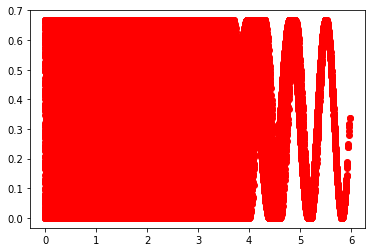

In [ ]:
list_of_x, list_of_y = generate_many_points(100000, 1)
#plt.plot(list_of_x, list_of_y)
plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
plt.show()

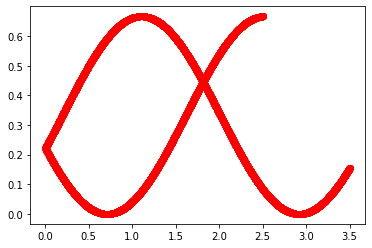

In [ ]:
list_of_x, list_of_y = generate_many_points(10000, 1)
#plt.plot(list_of_x, list_of_y)
plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
plt.show()

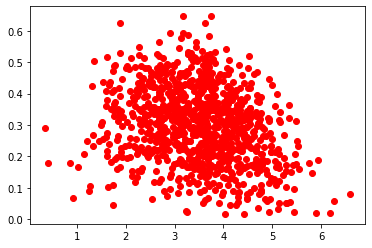

In [ ]:
list_of_x, list_of_y = generate_many_points(1000, 4)
#plt.plot(list_of_x, list_of_y)
plt.plot(list_of_x, list_of_y, color="red", marker="o",  linestyle="")
plt.show()

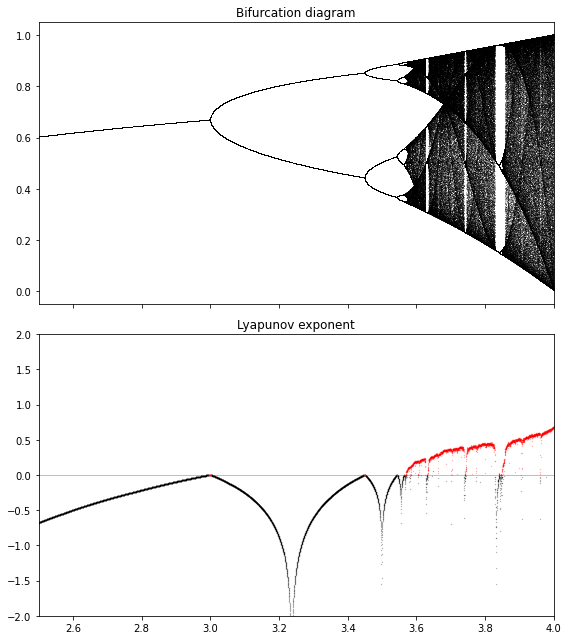

In [ ]:
def logistic(r, x):
    return r * x * (1 - x)
    
n = 10000
limInf = 2.5
limSup = 4
r = np.linspace(limInf, limSup, n)

iterations = 1000
last = 100
lyapunov = np.zeros(n)
x = 1e-5 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(limInf, limSup)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(limInf, limSup)
ax2.set_ylim(-2, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

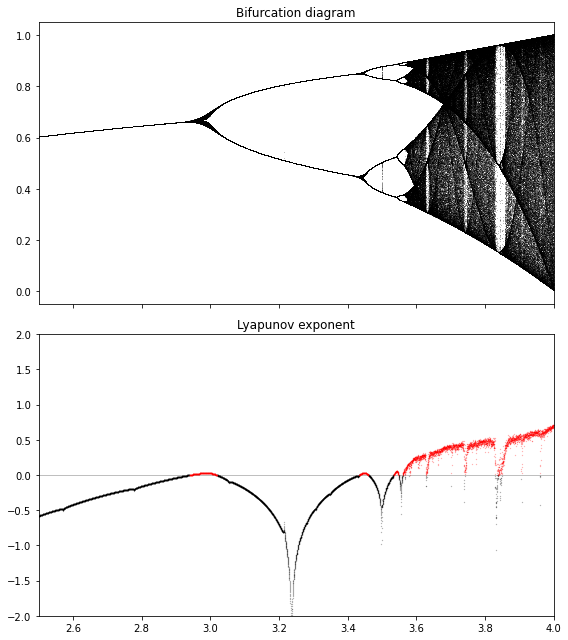

In [ ]:
def logistic(r, x):
    return r * x * (1 - x)
    
n = 10000
limInf = 2.5
limSup = 4
r = np.linspace(limInf, limSup, n)

iterations = 150
last = 100
lyapunov = np.zeros(n)
x = 1e-5 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(limInf, limSup)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(limInf, limSup)
ax2.set_ylim(-2, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

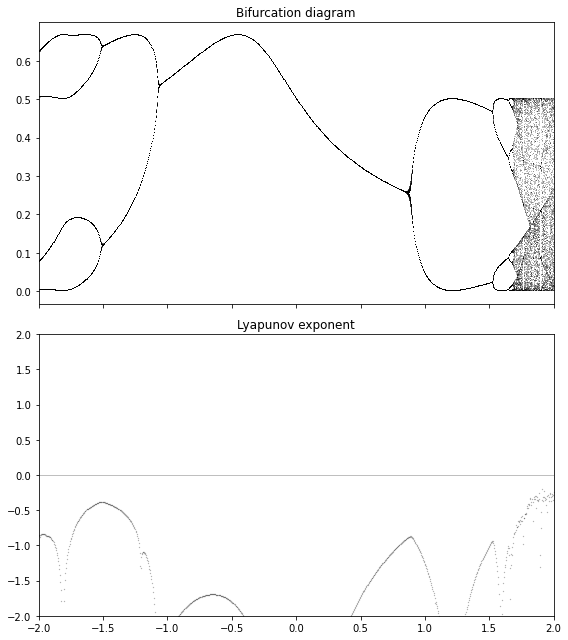

In [ ]:
def logistic(r, x):
    #return r * x * (1 - x)
    result = []
    for r_n, x_n in zip(r,x):
      #print(r_n, x_n)
      z,p_cog = create_classifier(np.array([x_n]), np.array([r_n]))
      result.append(p_cog.real)
    return result
    
n = 1000
limInf = -2
limSup = 2
r = np.linspace(limInf, limSup, n)

iterations = 200
last = 100
lyapunov = np.zeros(n)
x = -0.5 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(limInf, limSup)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(limInf, limSup)
ax2.set_ylim(-2, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

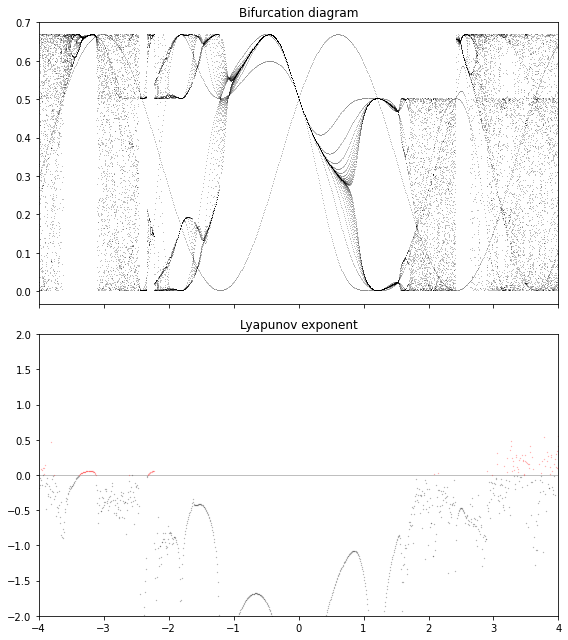

In [ ]:
def logistic(r, x):
    #return r * x * (1 - x)
    result = []
    for r_n, x_n in zip(r,x):
      #print(r_n, x_n)
      z,p_cog = create_classifier(np.array([x_n]), np.array([r_n]))
      result.append(p_cog.real)
    return result
    
n = 1000
limInf = -4
limSup = 4
r = np.linspace(limInf, limSup, n)

iterations = 30
last = 100
lyapunov = np.zeros(n)
x = -0.5 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(limInf, limSup)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(limInf, limSup)
ax2.set_ylim(-2, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()

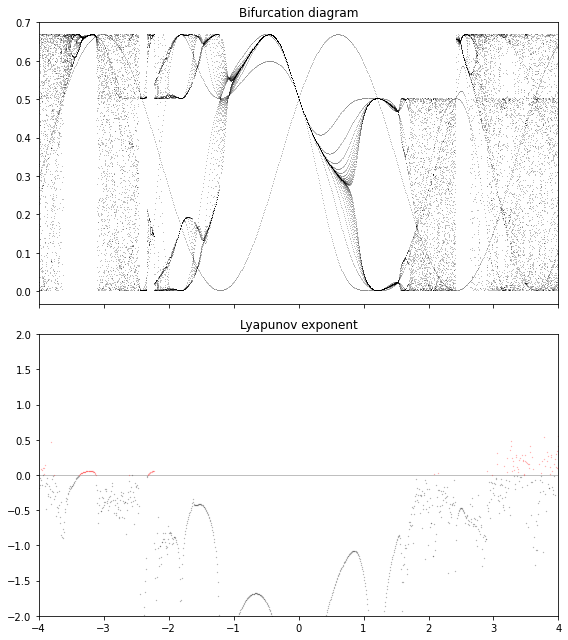

In [ ]:
def logistic(r, x):
    #return r * x * (1 - x)
    result = []
    for r_n, x_n in zip(r,x):
      #print(r_n, x_n)
      z,p_cog = create_classifier(np.array([x_n]), np.array([r_n]))
      result.append(p_cog.real)
    return result
    
n = 1000
limInf = -4
limSup = 4
r = np.linspace(limInf, limSup, n)

iterations = 30
last = 100
lyapunov = np.zeros(n)
x = -0.5 * np.ones(n)

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 9),
                               sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We compute the partial sum of the
    # Lyapunov exponent.
    lyapunov += np.log(abs(r - 2 * r * x))
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax1.plot(r, x, ',k', alpha=.25)
ax1.set_xlim(limInf, limSup)
ax1.set_title("Bifurcation diagram")

# We display the Lyapunov exponent.
# Horizontal line.
ax2.axhline(0, color='k', lw=.5, alpha=.5)
# Negative Lyapunov exponent.
ax2.plot(r[lyapunov < 0],
         lyapunov[lyapunov < 0] / iterations,
         '.k', alpha=.5, ms=.5)
# Positive Lyapunov exponent.
ax2.plot(r[lyapunov >= 0],
         lyapunov[lyapunov >= 0] / iterations,
         '.r', alpha=.5, ms=.5)
ax2.set_xlim(limInf, limSup)
ax2.set_ylim(-2, 2)
ax2.set_title("Lyapunov exponent")
plt.tight_layout()